<a href="https://colab.research.google.com/github/kamilamyslinska/Natural-Language-Processing-NLP/blob/main/Word_cloud_with_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Word cloud with users

In [1]:
import requests
from time import sleep
import pandas as pd
import re
from matplotlib import pyplot as plt
from random import randint
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

####File loading
The data comes from Instagram and concerns the Lodz-based clothing company Hexeline. These are data scraped from the company's public profile.

In [2]:
df = pd.read_csv('hashtaghexeline.csv')
df.sample(3)

,postUrl,profileUrl,username,fullName,commentCount,likeCount,pubDate,description,location,imgUrl,postId,ownerId,type,query,timestamp,isSidecar,sidecarMedias,videoUrl,viewCount
926,https://www.instagram.com/p/ew-DbMDvBb/,https://www.instagram.com/hot_moda_mag,hot_moda_mag,Hot Moda,1,16,2013-09-27T13:14:37.000Z,#autumn #campaign #aw13 #fashion #hexeline #,NaN,https://scontent-lhr8-2.cdninstagram.com/v/t51...,5.542157e+17,5.166260e+08,Photo,NaN,2022-09-16T14:36:45.594Z,False,NaN,NaN,NaN
859,https://www.instagram.com/p/BBP0bBLPjID/,https://www.instagram.com/rock_n_roll_baby_,rock_n_roll_baby_,Aśka | Jeździec | Podróżnik,1,16,2016-02-01T14:34:19.000Z,#backstage #hexeline #ss2016collection @marcin...,Daylight Studio,https://scontent-lhr8-2.cdninstagram.com/v/t51...,1.175389e+18,3.448640e+08,Photo,NaN,2022-09-16T14:36:37.150Z,False,NaN,NaN,NaN
674,https://www.instagram.com/p/BeEDY7FHoey/,https://www.instagram.com/anitka71,anitka71,NaN,2,73,2018-01-17T20:04:39.000Z,#jewellery #marynarka #hm #tous #polska #apart...,NaN,https://scontent-lhr8-2.cdninstagram.com/v/t51...,1.694494e+18,2.003630e+09,Photo,NaN,2022-09-16T14:36:09.316Z,False,NaN,NaN,NaN


In [3]:
df = df[df['description'].notnull()]

###Extracting instagram users who have posted #hexeline

In [4]:
user = df[~df.username.str.startswith('hexeline')]

In [5]:
dfu = user[['username', 'likeCount', 'commentCount']]

In [6]:
dfu.dropna(inplace=True)

In [7]:
u = dfu['username'].map(lambda x : re.findall(r'(#.*\S)', str(x))).to_list()

In [9]:
user = dfu['username'].unique()

In [14]:
user[:3]

array(['fashionablecompl', 'rafal_m_official', 'kate_lehmann'],
      dtype=object)

This is a graph showing the relationship between the number of likes for a given user and their use of #hexeline

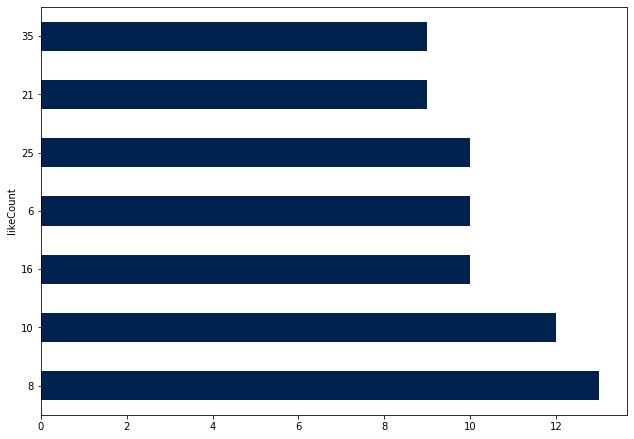

In [10]:
_ = dfu.groupby("likeCount").count()["username"].sort_values(ascending=False).head(n=7).plot.barh(figsize=(10.5, 7.5), cmap="cividis")

In [8]:
u =dfu['username'].to_list()

In [15]:
user_freq = pd.Series(u).value_counts()

In [16]:
user_freq[:5]

lamodalena           75
vanilla_komis        28
fashion_coco_club    26
centrumgalaxy        25
ooch50               22
dtype: int64

This is a chart of the TOP 10 users who used #hexeline

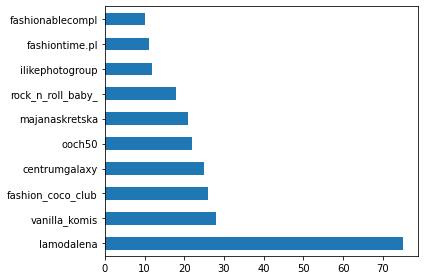

In [17]:
%matplotlib inline
user_freq[:10].plot(kind='barh')
plt.tight_layout()

In [18]:
#!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import wordcloud

This is a cloud of users who have used #hexeline

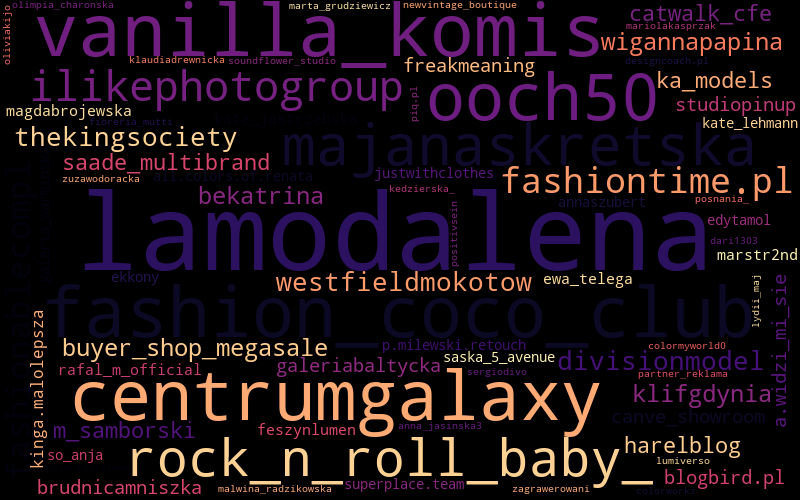

In [21]:
cloud = wordcloud.WordCloud(width=800, height=500, 
                                  colormap="magma_r") \
    .fit_words(dict(zip(user_freq.index, 
                        user_freq.tolist())))
cloud.to_image()